## ${\textbf{Libraries}}$

In [1]:
import numpy as np
import pandas as pd
import scipy

#Import the the visualization libraries.
#Seaborn works on top of matplotlib.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#For standardizing features and figures. I will use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
#Hierarchical clustering with the Sci Py library. I will use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#From Sk learn I'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# pickle is a library for export the modules
import pickle

## ${\textbf{Import Data}}$

In [2]:
# Load the data from customers on a csv file.
df_customers_segmentation = pd.read_csv('data_customers.csv', index_col = 0)

## ${\textbf{Explore Data}}$

In [3]:
# Descriptive analysis of the data set.
df_customers_segmentation.head()

,Sex,Age,Annual_purchase,City_size
ID,,,,
100000001,0,67,6234,2
100000002,1,22,7539,2
100000003,0,49,4461,0
100000004,0,45,8579,1
100000005,0,53,7452,1


In [4]:
#We verified that the dataset nulls free
df_customers_segmentation.isnull().sum()

Sex                0
Age                0
Annual_purchase    0
City_size          0
dtype: int64

In [5]:
# This dataset is from a fast moving consumer goods company from customer's Loyalty Card
# The dataset has 5 columns, ID, Sex,Age, Annual_purchase and City_size
# ID shows the unique identifier from customer, every row is a customer.
# Sex is the biological sex(gender), there two options 0 male, 1 female.
# Age is the age in years of customer.
# Annual_purchase, it's the sum client anual spend in euros
# City_size, it's the size of the city that the customer live in:
#   0, small city
#   1, mid-sized city
#   2, big city

In [6]:
df_customers_segmentation.describe()

,Sex,Age,Annual_purchase,City_size
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.457000,35.909000,6047.998000,0.739000
std,0.498272,11.719402,1905.433761,0.812533
min,0.000000,18.000000,1792.000000,0.000000
25%,0.000000,27.000000,4883.250000,0.000000
50%,0.000000,33.000000,5778.000000,1.000000
75%,1.000000,42.000000,6904.000000,1.000000
max,1.000000,76.000000,15468.000000,2.000000


In [7]:
# data on exploration:
# as we see the mean of age is 35,9 years, min 18, max 76.
# gender 45 % are female and 55% males.
# most of our customers are from mid-size city.

## ${\textbf{Correlation Estimate}}$

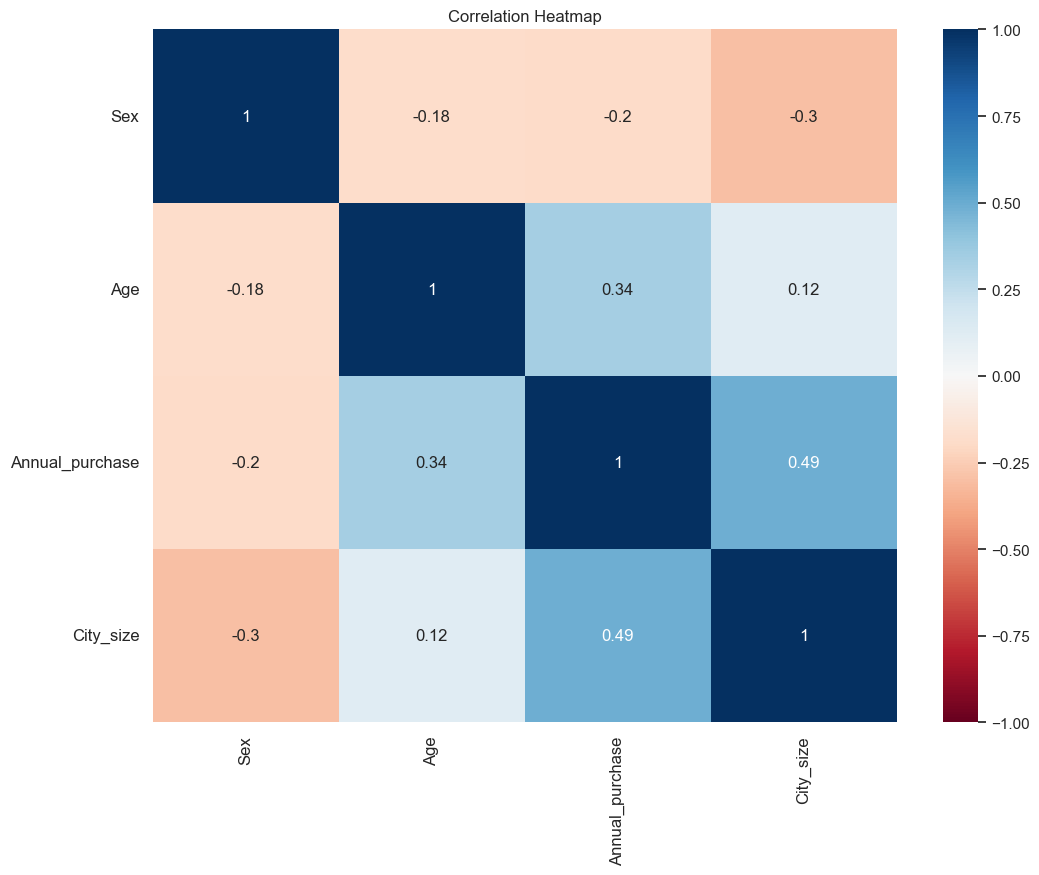

In [8]:
# Compute Pearson correlation coefficient for the features in our data set.
# We'll plot the correlations using a Heat Map. 
# We set the range from -1 to 1, as it is the range of the Pearson Correlation. 
# Otherwise the function infers the boundaries from the input.
# In this case they will be -0,3 to 0,49, as they are the minumum and maximum correlation indeces between our features.
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_customers_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
#annual purchase and city size are lighty correlated, aslo age and annual purchase are lighty correlated

## ${\textbf{Visualize Raw Data}}$

Text(0.5, 1.0, 'Visualization of raw data')

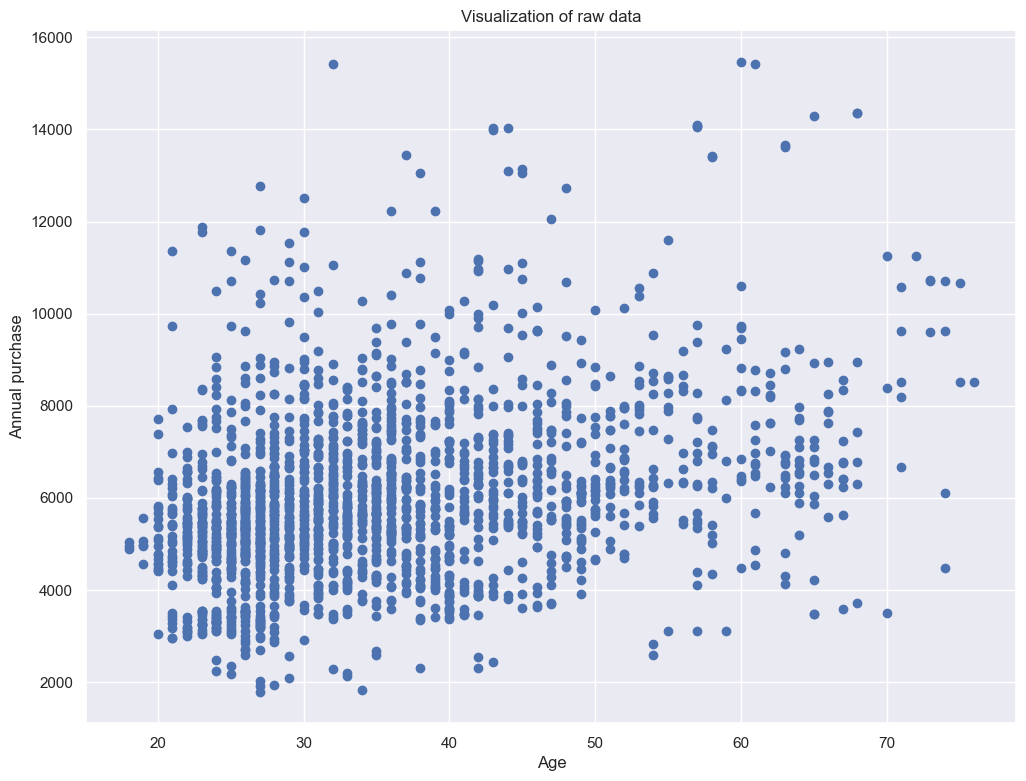

In [10]:
# We'll plot the data.
# We have 2000 data points, which we'll scatter Age and annual purchase, located on positions 1 and 2 in our data set. 
plt.figure(figsize = (12, 9))
plt.scatter(df_customers_segmentation.iloc[:, 1], df_customers_segmentation.iloc[:, 2])
plt.xlabel('Age')
plt.ylabel('Annual purchase')
plt.title('Visualization of raw data')

## ${\textbf{Standardization}}$

In [11]:
# Standardizing data, so that all features have equal weight. This is important for modelling.
# Otherwise, in our case annual purchase would be considered much more important than age. 
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_customers_segmentation)

## ${\textbf{Hierarchical Clustering}}$

In [12]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(segmentation_std, method = 'ward')

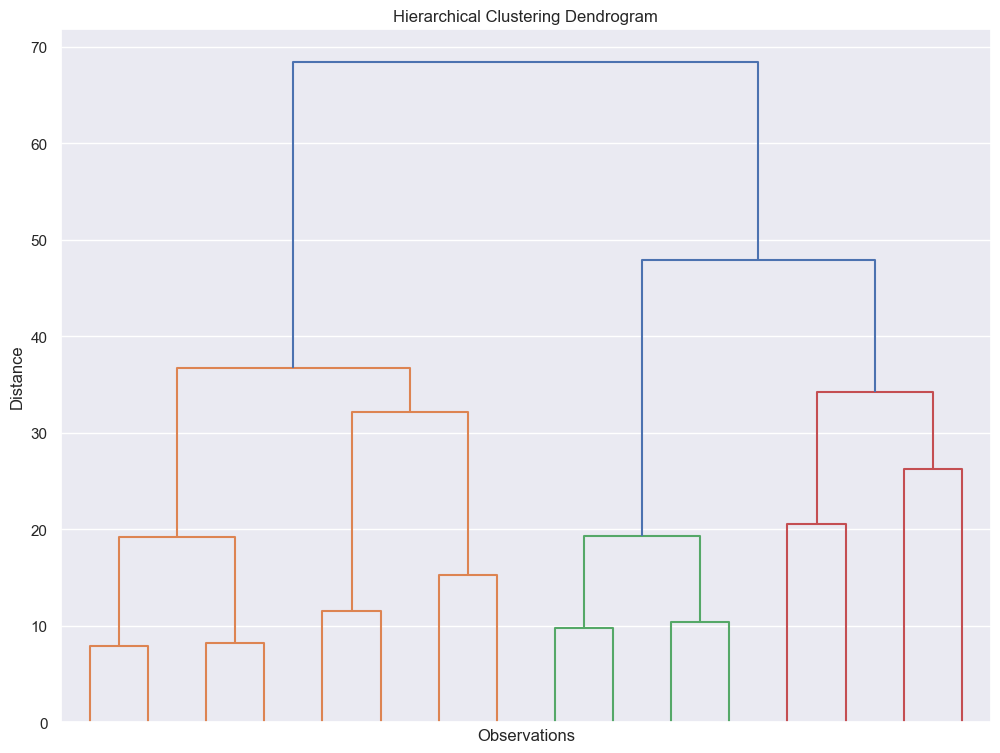

In [13]:
# We plot the results from the Hierarchical Clustering using a Dendrogram. 
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 3, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

## ${\textbf{K-means Clustering}}$

In [14]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points.
# And we set a random state for reproducibility. Always 42 ;-)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10,random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

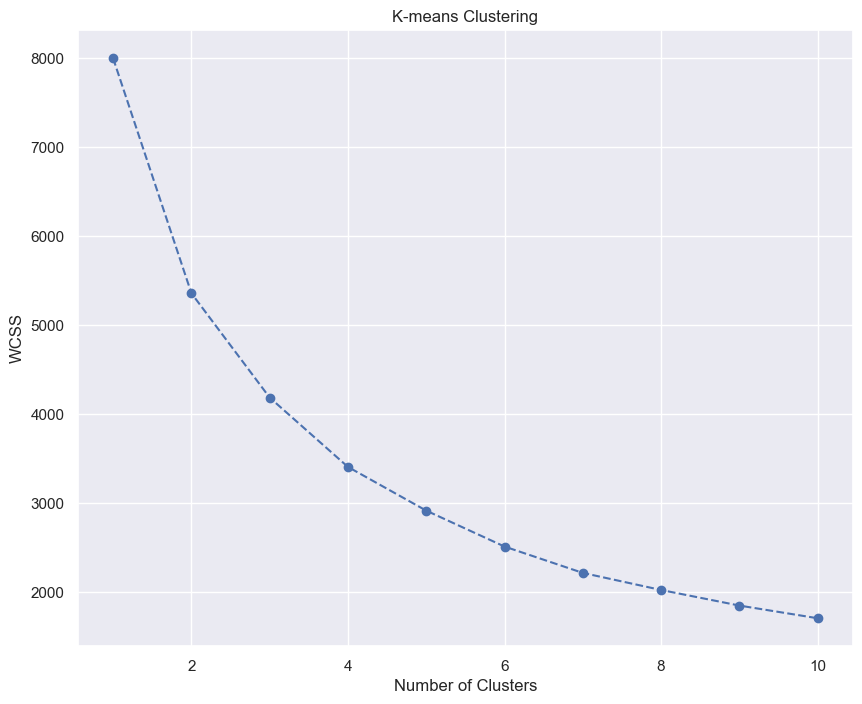

In [15]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [16]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [17]:
# We divide our data into the four clusters.
kmeans.fit(segmentation_std)

C:\Users\usuario\anaconda3\envs\master\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

### ${\textbf{Results}}$

In [18]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_customers_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [19]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Age,Annual_purchase,City_size
Segment K-means,,,,
0,0.302251,55.176849,8202.745981,1.228296
1,1.000000,31.307377,5184.136612,0.213115
2,0.000000,34.478632,5046.702991,0.202991
3,0.179959,31.912065,6929.032720,1.728016


In [20]:
# Calculate the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [21]:
df_segm_analysis

,Sex,Age,Annual_purchase,City_size,N Obs,Prop Obs
Segment K-means,,,,,,
0,0.302251,55.176849,8202.745981,1.228296,311,0.1555
1,1.000000,31.307377,5184.136612,0.213115,732,0.3660
2,0.000000,34.478632,5046.702991,0.202991,468,0.2340
3,0.179959,31.912065,6929.032720,1.728016,489,0.2445


In [22]:
df_segm_analysis.rename({0:'mature medium city',
                         1:'male small city ',
                         2:'female small city',
                         3:'young big city'})

,Sex,Age,Annual_purchase,City_size,N Obs,Prop Obs
Segment K-means,,,,,,
mature medium city,0.302251,55.176849,8202.745981,1.228296,311,0.1555
male small city,1.000000,31.307377,5184.136612,0.213115,732,0.3660
female small city,0.000000,34.478632,5046.702991,0.202991,468,0.2340
young big city,0.179959,31.912065,6929.032720,1.728016,489,0.2445


In [23]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'mature medium city',
                         1:'male small city ',
                         2:'female small city',
                         3:'young big city'})

In [24]:
df_segm_kmeans

,Sex,Age,Annual_purchase,City_size,Segment K-means,Labels
ID,,,,,,
100000001,0,67,6234,2,0,mature medium city
100000002,1,22,7539,2,3,young big city
100000003,0,49,4461,0,2,female small city
100000004,0,45,8579,1,0,mature medium city
100000005,0,53,7452,1,0,mature medium city
...,...,...,...,...,...,...
100001996,1,47,6177,0,1,male small city
100001997,1,27,5887,0,1,male small city
100001998,0,31,4320,0,2,female small city


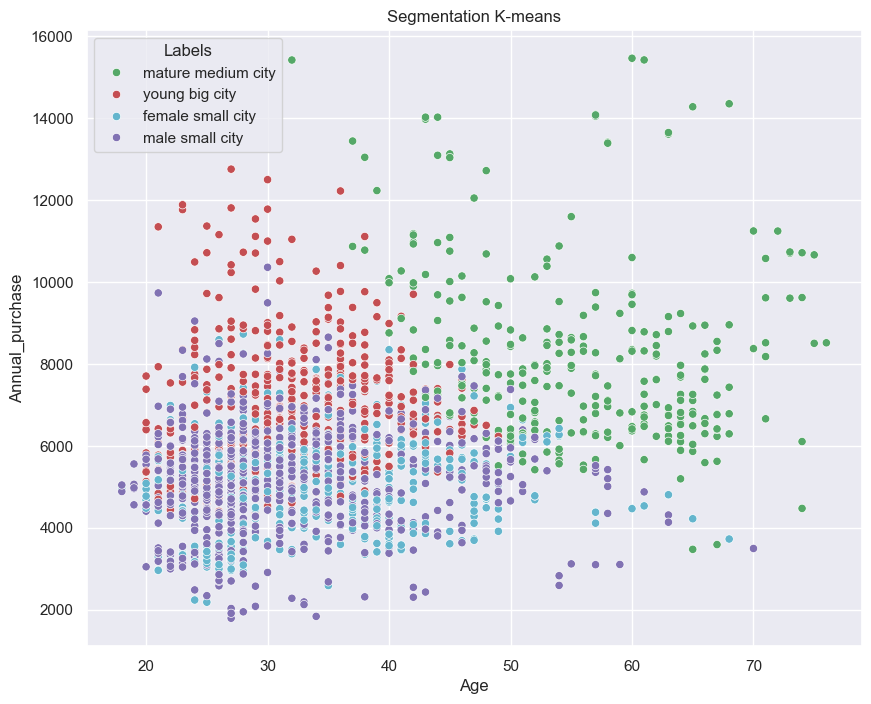

In [25]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Annual_purchase']
plt.figure(figsize = (10, 8))
sns.scatterplot(x= x_axis, y= y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

### ${\textbf{PCA}}$

In [26]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [27]:
# Fit PCA with our standardized data.
pca.fit(segmentation_std)

PCA()

In [28]:
# The attribute shows how much variance is explained by each of the individual components.
pca.explained_variance_ratio_

array([0.46004923, 0.22504126, 0.2064131 , 0.10849641])

Text(0, 0.5, 'Cumulative Explained Variance')

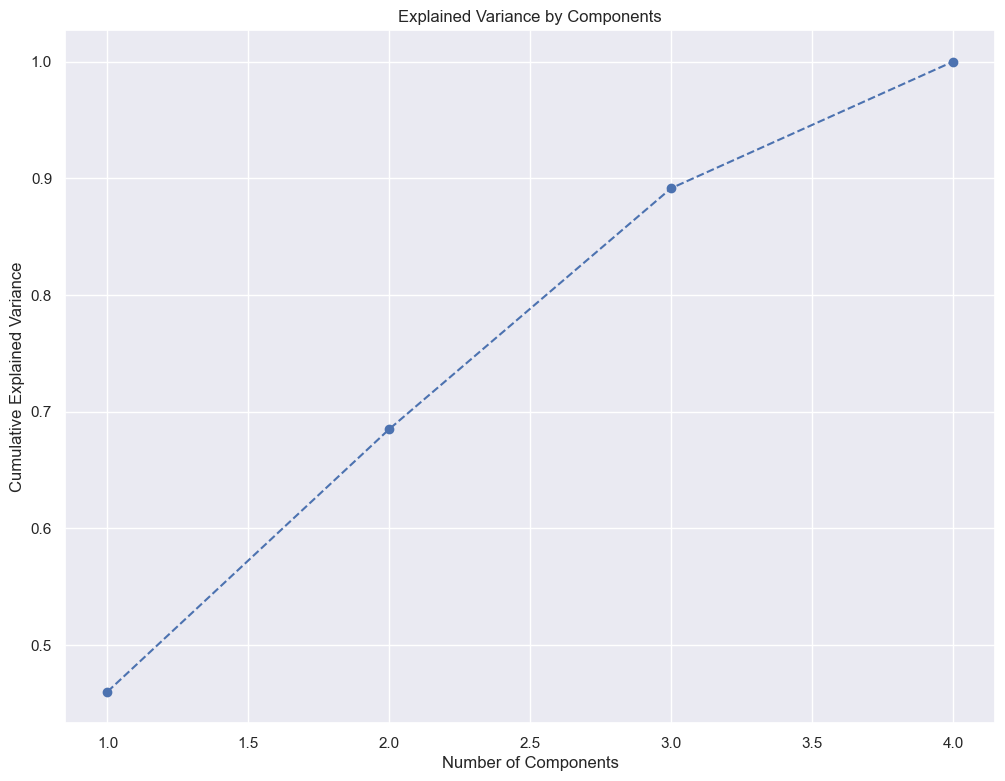

In [29]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [30]:
# We choose three components. 3 seems the right choice according to the previous graph.
pca = PCA(n_components = 3)

In [31]:
# Fit the model the our data with the selected number of components.(3)
pca.fit(segmentation_std)

PCA(n_components=3)

### ${\textbf{PCA Results}}$

In [32]:
# The components attribute shows the loadings of each component on each of the original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[-0.42399436,  0.40961081,  0.58805762,  0.55374723],
       [ 0.34864319,  0.8158369 ,  0.10594229, -0.44903708],
       [ 0.80933845, -0.2248093 ,  0.43612695,  0.3228395 ]])

In [33]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_customers_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Age,Annual_purchase,City_size
Component 1,-0.423994,0.409611,0.588058,0.553747
Component 2,0.348643,0.815837,0.105942,-0.449037
Component 3,0.809338,-0.224809,0.436127,0.322839


([<matplotlib.axis.YTick at 0x244f90aa8e0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

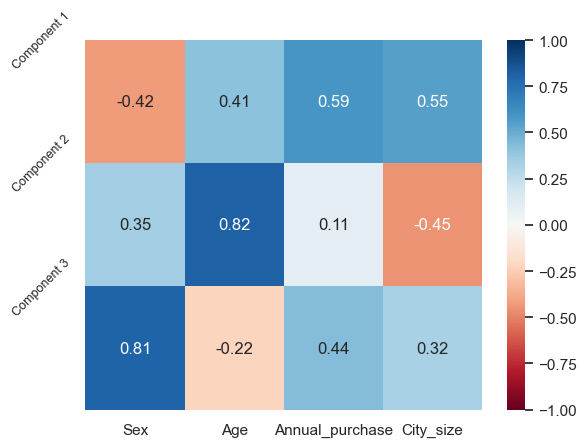

In [34]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [35]:
pca.transform(segmentation_std)

array([[ 2.39293589,  1.15836413, -0.79530734],
       [ 0.37143414, -1.20260304,  1.99159521],
       [-0.14702764,  0.91194563, -1.6506981 ],
       ...,
       [-0.81983867, -0.34926506, -1.33760486],
       [-1.73696604, -0.10460653,  0.55396159],
       [-1.3071202 , -0.81705175, -1.42830002]])

In [36]:
scores_pca = pca.transform(segmentation_std)

### ${\textbf{K-means clustering with PCA}}$

In [37]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++',n_init=10, random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

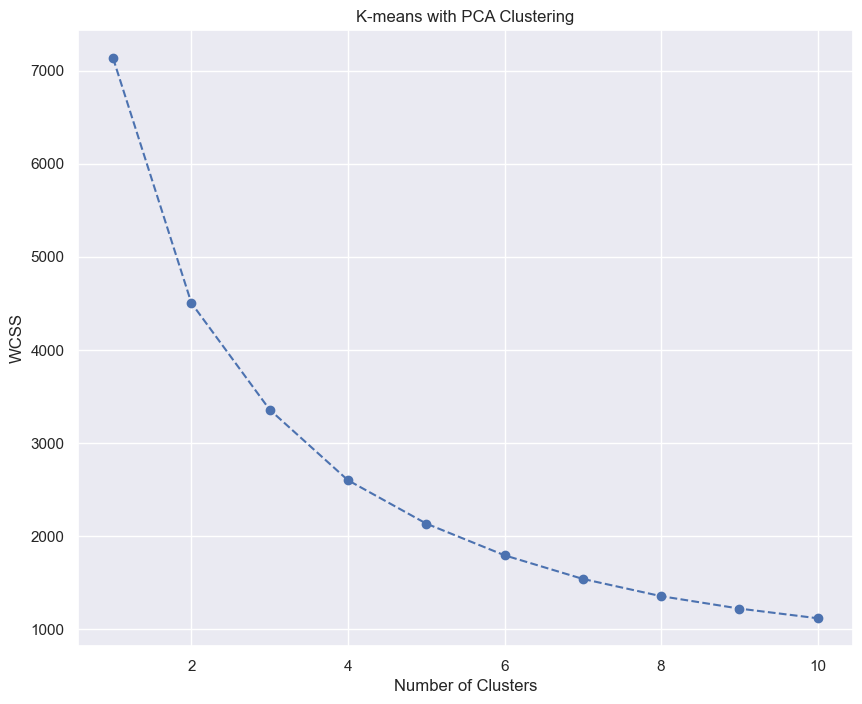

In [38]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# it looks 4  the best option
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [39]:
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++',n_init=10, random_state = 42)

In [40]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, n_init=10, random_state=42)

### ${\textbf{K-means clustering with PCA Results}}$

In [41]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_customers_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [42]:
df_segm_pca_kmeans

,Sex,Age,Annual_purchase,City_size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,67,6234,2,2.392936,1.158364,-0.795307,0
1,1,22,7539,2,0.371434,-1.202603,1.991595,2
2,0,49,4461,0,-0.147028,0.911946,-1.650698,1
3,0,45,8579,1,1.666030,0.309660,-0.233736,0
4,0,53,7452,1,1.597809,0.804036,-0.645255,0
...,...,...,...,...,...,...,...,...
1995,1,47,6177,0,-0.538363,1.567995,0.405239,2
1996,1,27,5887,0,-1.327091,0.159235,0.722595,2
1997,0,31,4320,0,-0.819839,-0.349265,-1.337605,1
1998,1,24,4899,0,-1.736966,-0.104607,0.553962,2


In [43]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Age,Annual_purchase,City_size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,
0,0.16443,43.474832,7946.484899,1.583893,1.675528,-0.039398,0.149919
1,0.00000,33.952381,5196.200680,0.430272,-0.152834,-0.332802,-1.022653
2,1.00000,31.792892,5275.153186,0.344363,-1.113662,0.268589,0.627412


In [44]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'young big city',
                         1:'female small city ',
                         2:'male small city'})
df_segm_pca_kmeans_freq

,Sex,Age,Annual_purchase,City_size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,
young big city,0.16443,43.474832,7946.484899,1.583893,1.675528,-0.039398,0.149919,596,0.298
female small city,0.00000,33.952381,5196.200680,0.430272,-0.152834,-0.332802,-1.022653,588,0.294
male small city,1.00000,31.792892,5275.153186,0.344363,-1.113662,0.268589,0.627412,816,0.408


In [45]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'young big city',
                         1:'female small city ',
                         2:'male small city'})

C:\Users\usuario\AppData\Local\Temp\ipykernel_3120\188811662.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])


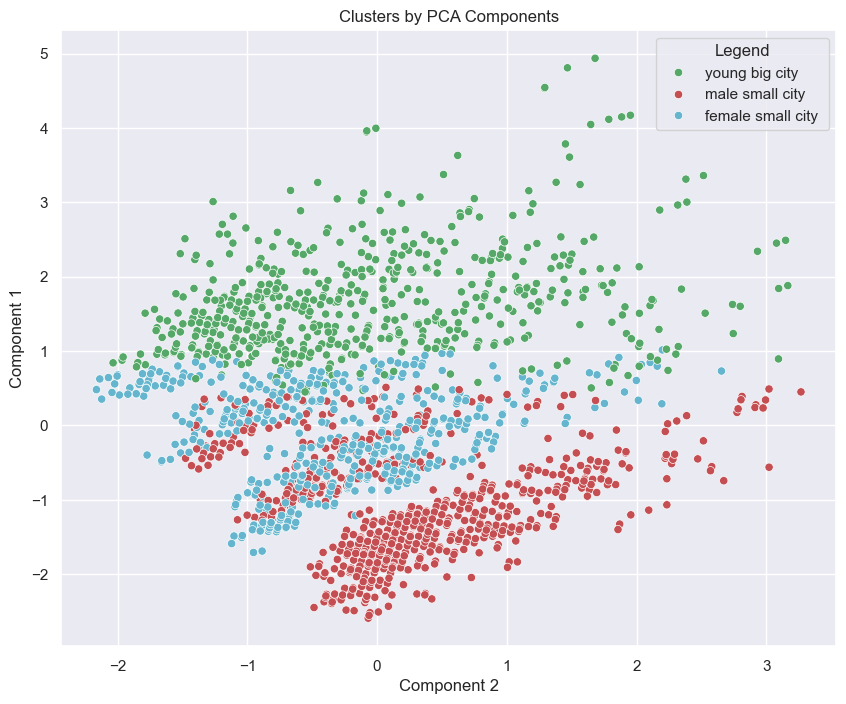

In [46]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

### ${\textbf{Data Export}}$

In [47]:
# We export them as pickle objects.
# We need the scaler, pca and kmeans_pca objects to preprocess and segment the purchase data set.
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [48]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [49]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))